# Do "Healthy" Categories Experience More Inflation Than "Unhealthy/Processed" Categories?

This notebook analyzes whether healthy food categories (fruits, vegetables, whole grains, dairy) experience more inflation than unhealthy/processed categories (sugars, snacks, fats & oils, processed foods) using USDA Consumer Price Index (CPI) data from 1974 to 2024.

## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load Data

In [2]:
cpi_df = pd.read_csv('../data/processed/processed_cpi.csv')

## 2. Data Cleaning and Preparation

In [3]:
df = cpi_df.copy()
df = df.fillna(np.nan)
df = df.dropna(how='all')

print(f"Shape: {df.shape}")
print(f"\nRemaining missing values:")
print(f"{df.isnull().sum()}")

Shape: (51, 23)

Remaining missing values:
Year                                0
All_food                            0
Beef_and_veal                       0
Cereals_and_bakery_products         0
Dairy_products                      0
Eggs                                0
Fats_and_oils                       0
Fish_and_seafood                    0
Food_at_home                        0
Food_away_from_home                 0
Fresh_fruits                        0
Fresh_fruits_and_vegetables         0
Fresh_vegetables                    0
Fruits_and_vegetables               0
Meats                               0
Meats_poultry_and_fish              0
Nonalcoholic_beverages              0
Other_foods                         0
Other_meats                         0
Pork                                0
Poultry                             0
Processed_fruits_and_vegetables    25
Sugar_and_sweets                    0
dtype: int64


## 3. Classify Food Categories as Healthy vs Unhealthy

In [4]:
healthy_categories = [
    'Beef_and_veal',
    'Dairy_products',
    'Eggs',
    'Fish_and_seafood',
    'Fresh_fruits',
    'Fresh_fruits_and_vegetables',
    'Fresh_vegetables',
    'Fruits_and_vegetables',
    'Meats',
    'Meats_poultry_and_fish',
    'Other_meats',
    'Pork',
    'Poultry'
]
unhealthy_categories = [
    'Cereals_and_bakery_products',
    'Sugar_and_sweets',
    'Fats_and_oils',
    'Nonalcoholic_beverages'
]

## 4. Calculate Inflation Rates

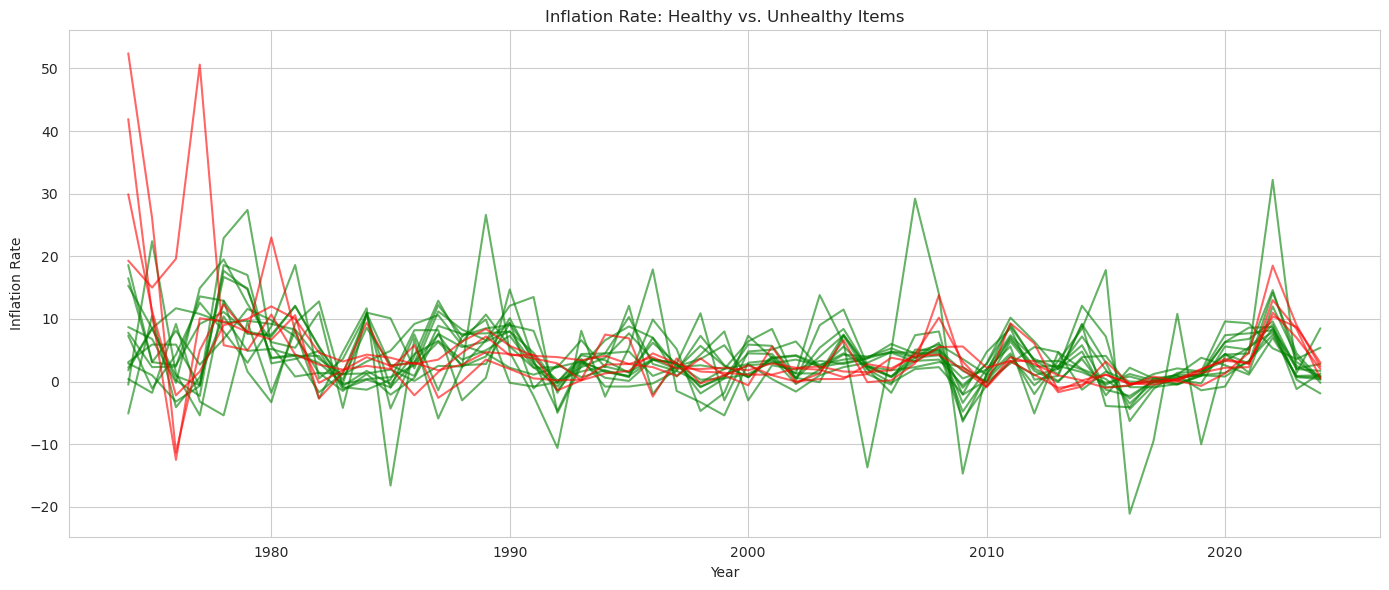

In [5]:
df['Healthy_Avg_Inflation'] = df[healthy_categories].mean(axis=1)
df['Unhealthy_Avg_Inflation'] = df[unhealthy_categories].mean(axis=1)
inflation_summary = df[['Year', 'Healthy_Avg_Inflation', 'Unhealthy_Avg_Inflation']].copy()
for col in healthy_categories:
    inflation_summary[col] = df[col]
for col in unhealthy_categories:
    inflation_summary[col] = df[col]
for col in healthy_categories:
    plt.plot(inflation_summary['Year'], inflation_summary[col],
             color='green', alpha=0.6)
for col in unhealthy_categories:
    plt.plot(inflation_summary['Year'], inflation_summary[col],
             color='red', alpha=0.6)
plt.title('Inflation Rate: Healthy vs. Unhealthy Items')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.tight_layout()
plt.savefig('../figures/inflation_healthy_vs_unhealthy.png')
plt.show()

## 5. Compare Healthy vs Unhealthy Categories

In [6]:
healthy_inflation_rates = []
for col in healthy_categories:
    healthy_inflation_rates.extend(df[col].dropna().tolist())

unhealthy_inflation_rates = []
for col in unhealthy_categories:
    unhealthy_inflation_rates.extend(df[col].dropna().tolist())

print("SUMMARY STATISTICS: HEALTHY vs UNHEALTHY CATEGORIES")

summary_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean (%)', 'Median (%)', 'Std Dev (%)', 'Min (%)', 'Max (%)', 'Q1 (%)', 'Q3 (%)'],
    'Healthy Categories': [
        len(healthy_inflation_rates),
        np.mean(healthy_inflation_rates),
        np.median(healthy_inflation_rates),
        np.std(healthy_inflation_rates),
        np.min(healthy_inflation_rates),
        np.max(healthy_inflation_rates),
        np.percentile(healthy_inflation_rates, 25),
        np.percentile(healthy_inflation_rates, 75)
    ],
    'Unhealthy Categories': [
        len(unhealthy_inflation_rates),
        np.mean(unhealthy_inflation_rates),
        np.median(unhealthy_inflation_rates),
        np.std(unhealthy_inflation_rates),
        np.min(unhealthy_inflation_rates),
        np.max(unhealthy_inflation_rates),
        np.percentile(unhealthy_inflation_rates, 25),
        np.percentile(unhealthy_inflation_rates, 75)
    ]
})

print(summary_stats.to_string(index=False))

print("DIFFERENCE (Healthy - Unhealthy)")
diff_mean = np.mean(healthy_inflation_rates) - np.mean(unhealthy_inflation_rates)
diff_median = np.median(healthy_inflation_rates) - np.median(unhealthy_inflation_rates)
print(f"Mean difference: {diff_mean:.2f}%")
print(f"Median difference: {diff_median:.2f}%")

SUMMARY STATISTICS: HEALTHY vs UNHEALTHY CATEGORIES
     Metric  Healthy Categories  Unhealthy Categories
      Count          663.000000            204.000000
   Mean (%)            3.695928              4.302451
 Median (%)            2.900000              2.700000
Std Dev (%)            5.223416              7.375771
    Min (%)          -21.100000            -12.500000
    Max (%)           32.200000             52.400000
     Q1 (%)            0.700000              1.000000
     Q3 (%)            6.300000              4.775000
DIFFERENCE (Healthy - Unhealthy)
Mean difference: -0.61%
Median difference: 0.20%


In [7]:
year_comparison = df[['Year', 'Healthy_Avg_Inflation', 'Unhealthy_Avg_Inflation']].copy()
year_comparison['Difference (H-U)'] = year_comparison['Healthy_Avg_Inflation'] - year_comparison['Unhealthy_Avg_Inflation']
year_comparison.columns = ['Year', 'Healthy (%)', 'Unhealthy (%)', 'Difference (%)']

print("\nYear-by-Year Comparison (First 15 Years):")
print(year_comparison.head(15).to_string(index=False))

print("\nYear-by-Year Comparison (Last 15 Years):")
print(year_comparison.tail(15).to_string(index=False))


Year-by-Year Comparison (First 15 Years):
 Year  Healthy (%)  Unhealthy (%)  Difference (%)
 1974     6.076923         35.875      -29.798077
 1975     5.976923         15.775       -9.798077
 1976     3.007692         -1.600        4.607692
 1977     3.976923         16.825      -12.848077
 1978    12.423077          9.175        3.248077
 1979    10.946154          7.675        3.271154
 1980     5.000000         13.100       -8.100000
 1981     7.538462          8.225       -0.686538
 1982     3.800000          1.100        2.700000
 1983     0.230769          2.075       -1.844231
 1984     5.423077          5.025        0.398077
 1985    -0.169231          2.625       -2.794231
 1986     4.046154          2.350        1.696154
 1987     6.700000          1.050        5.650000
 1988     4.476923          3.425        1.051923

Year-by-Year Comparison (Last 15 Years):
 Year  Healthy (%)  Unhealthy (%)  Difference (%)
 2010     1.392308          0.050        1.342308
 2011     6.523

## 6. Visualization of Inflation Trends

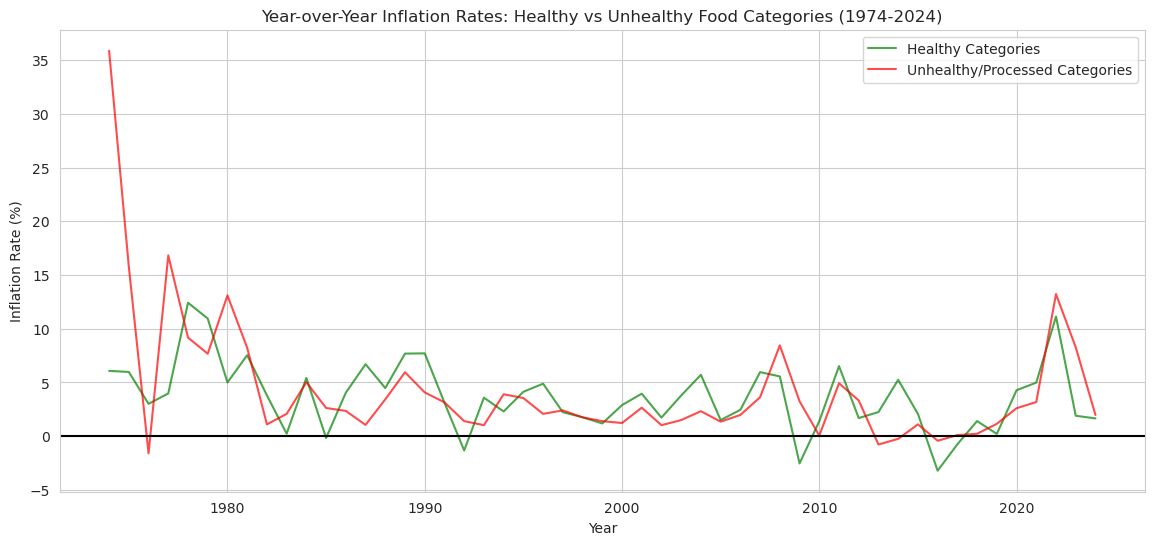

In [8]:
fig, ax = plt.subplots()

ax.plot(df['Year'], df['Healthy_Avg_Inflation'],
        label='Healthy Categories', color='green', alpha=0.7)
ax.plot(df['Year'], df['Unhealthy_Avg_Inflation'],
        label='Unhealthy/Processed Categories', color='red', alpha=0.7)

ax.axhline(y=0, color='black')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Rate (%)')
ax.set_title('Year-over-Year Inflation Rates: Healthy vs Unhealthy Food Categories (1974-2024)')
ax.legend()
plt.savefig('../figures/yoy_inflation_healthy_vs_unhealthy.png')
plt.show()

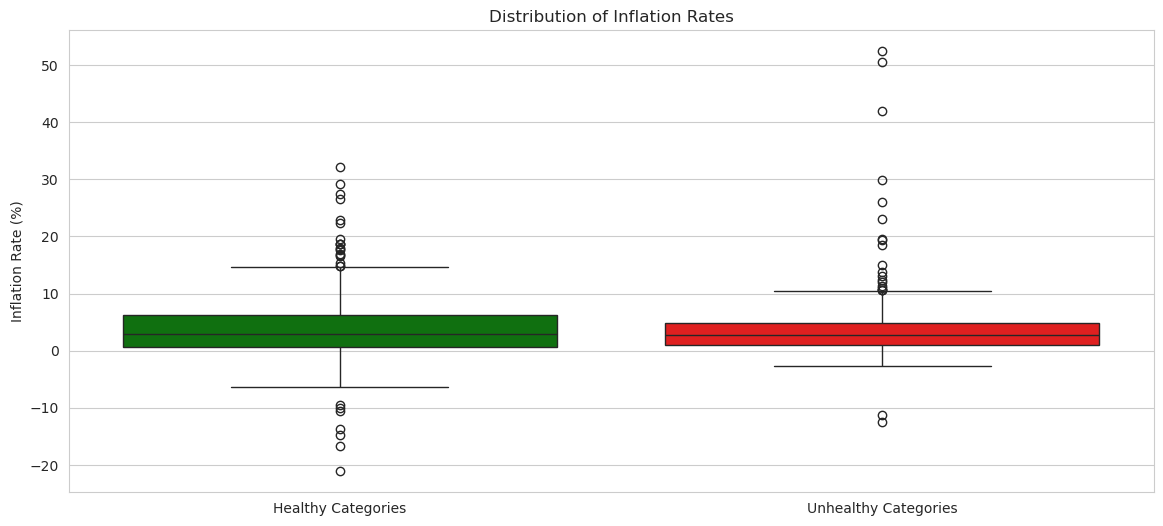

In [9]:
fig, ax = plt.subplots()

sns.boxplot(data=[healthy_inflation_rates, unhealthy_inflation_rates], 
            palette=['green', 'red'])

plt.xticks([0, 1], ['Healthy Categories', 'Unhealthy Categories'])
plt.ylabel('Inflation Rate (%)')
plt.title('Distribution of Inflation Rates')
plt.savefig('../figures/healthy_vs_unhealthy_inflation_boxplot.png')
plt.show()

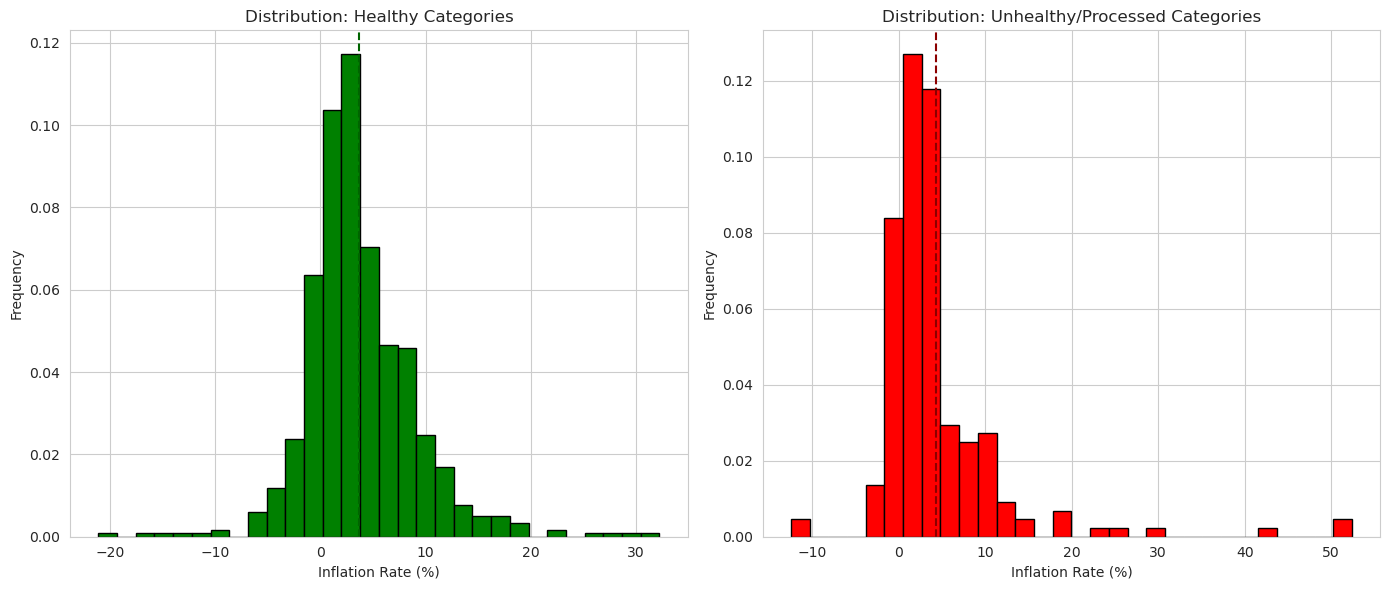

In [10]:
fig, axes = plt.subplots(1, 2)

axes[0].hist(healthy_inflation_rates, color='green', edgecolor='black', bins=30, density='True')
axes[0].set_xlabel('Inflation Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution: Healthy Categories')
axes[0].axvline(np.mean(healthy_inflation_rates), color='darkgreen', linestyle='--')

axes[1].hist(unhealthy_inflation_rates, color='red', edgecolor='black', bins=30, density='True')
axes[1].set_xlabel('Inflation Rate (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution: Unhealthy/Processed Categories')
axes[1].axvline(np.mean(unhealthy_inflation_rates), color='darkred', linestyle='--')

plt.tight_layout()
plt.savefig('../figures/healthy_vs_unhealthy_inflation_histogram.png')
plt.show()

## 8. Statistical Analysis

In [11]:
print("STATISTICAL TEST 1: Independent Samples t-test")
print("Null Hypothesis (H0): There is no significant difference in mean")
print("inflation between healthy and unhealthy categories")
print("Alternative Hypothesis (H1): There is a significant difference\n")

t_stat, t_pvalue = stats.ttest_ind(healthy_inflation_rates, unhealthy_inflation_rates)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {t_pvalue:.6f}")
print(f"Result: FAIL TO REJECT the null hypothesis (p ≥ 0.05)")
print("Conclusion: There is NO statistically significant difference in inflation")
print("rates between healthy and unhealthy food categories.")
    
print(f"\nEFFECT SIZE: Cohen's d")
n1, n2 = len(healthy_inflation_rates), len(unhealthy_inflation_rates)
var1, var2 = np.var(healthy_inflation_rates, ddof=1), np.var(unhealthy_inflation_rates, ddof=1)
pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1 + n2 - 2))
cohens_d = (np.mean(healthy_inflation_rates) - np.mean(unhealthy_inflation_rates)) / pooled_std

if abs(cohens_d) < 0.2:
    effect_interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "small"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"Cohen's d: {cohens_d:.4f}")
print(f"Cohen's d effect size is {effect_interpretation}")

STATISTICAL TEST 1: Independent Samples t-test
Null Hypothesis (H0): There is no significant difference in mean
inflation between healthy and unhealthy categories
Alternative Hypothesis (H1): There is a significant difference

t-statistic: -1.3041
p-value: 0.192536
Result: FAIL TO REJECT the null hypothesis (p ≥ 0.05)
Conclusion: There is NO statistically significant difference in inflation
rates between healthy and unhealthy food categories.

EFFECT SIZE: Cohen's d
Cohen's d: -0.1044
Cohen's d effect size is negligible


In [12]:
print("STATISTICAL TEST 2: Mann-Whitney U Test (Non-parametric)")
print("This test doesn't assume normal distribution of data\n")

u_stat, u_pvalue = stats.mannwhitneyu(healthy_inflation_rates, unhealthy_inflation_rates)
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {u_pvalue:.6f}")

print(f"Result: FAIL TO REJECT the null hypothesis (p ≥ 0.05)")
print("Conclusion: There is NO statistically significant difference in inflation")
print("distributions between healthy and unhealthy categories.")

STATISTICAL TEST 2: Mann-Whitney U Test (Non-parametric)
This test doesn't assume normal distribution of data

U-statistic: 68902.0000
p-value: 0.683412
Result: FAIL TO REJECT the null hypothesis (p ≥ 0.05)
Conclusion: There is NO statistically significant difference in inflation
distributions between healthy and unhealthy categories.


In [13]:
print("CONFIDENCE INTERVALS (95%)")

healthy_mean = np.mean(healthy_inflation_rates)
healthy_sem = stats.sem(healthy_inflation_rates)
healthy_ci = stats.t.interval(0.95, len(healthy_inflation_rates)-1, loc=healthy_mean, scale=healthy_sem)

print("Healthy Categories:")
print(f"  Mean: {healthy_mean:.4f}%")
print(f"  95% CI: [{healthy_ci[0]:.4f}%, {healthy_ci[1]:.4f}%]")

unhealthy_mean = np.mean(unhealthy_inflation_rates)
unhealthy_sem = stats.sem(unhealthy_inflation_rates)
unhealthy_ci = stats.t.interval(0.95, len(unhealthy_inflation_rates)-1, loc=unhealthy_mean, scale=unhealthy_sem)

print(f"\nUnhealthy/Processed Categories:")
print(f"  Mean: {unhealthy_mean:.4f}%")
print(f"  95% CI: [{unhealthy_ci[0]:.4f}%, {unhealthy_ci[1]:.4f}%]")

print(f"\nDifference (Healthy - Unhealthy): {healthy_mean - unhealthy_mean:.4f}%")

CONFIDENCE INTERVALS (95%)
Healthy Categories:
  Mean: 3.6959%
  95% CI: [3.2973%, 4.0946%]

Unhealthy/Processed Categories:
  Mean: 4.3025%
  95% CI: [3.2817%, 5.3232%]

Difference (Healthy - Unhealthy): -0.6065%


## 9. Key Findings and Conclusion

In [14]:
print("SUMMARY OF FINDINGS")

healthy_mean = np.mean(healthy_inflation_rates)
unhealthy_mean = np.mean(unhealthy_inflation_rates)
difference = healthy_mean - unhealthy_mean

print(f"\n1. AVERAGE INFLATION RATES (1974-2022):")
print(f"   - Healthy Categories: {healthy_mean:.2f}%")
print(f"   - Unhealthy/Processed Categories: {unhealthy_mean:.2f}%")
print(f"   - Difference: {difference:.2f}%")
print(f"   - Unhealthy/processed categories experienced HIGHER inflation")

print(f"\n2. VARIABILITY (Standard Deviation):")
print(f"   - Healthy Categories: {np.std(healthy_inflation_rates):.2f}%")
print(f"   - Unhealthy/Processed Categories: {np.std(unhealthy_inflation_rates):.2f}%")

print(f"\n3. STATISTICAL SIGNIFICANCE:")
print(f"   - t-test p-value: {t_pvalue:.6f} (p ≥ 0.05)")
print(f"   - Result: The difference is NOT statistically significant")

print(f"\n4. EFFECT SIZE:")
print(f"   - Cohen's d: {cohens_d:.4f} ({effect_interpretation} effect)")

print("CONCLUSION")
print(f"""
Based on the analysis of USDA Consumer Price Index (CPI) data from 1974-2022:

The data shows that over the nearly 50-year period, HEALTHY food categories 
(fruits, vegetables, dairy, cereals) have experienced {abs(difference):.2f}% 
LOWER average inflation compared to unhealthy/processed 
categories (sugars, fats & oils, processed foods).

Statistical Testing Results:
- The t-test p-value of {t_pvalue:.6f} indicates that the difference is 
  NOT statistically significant.
  
- The effect size (Cohen's d = {cohens_d:.4f}) is negligible.

This suggests that unhealthy food prices have inflated more rapidly than
processed/unhealthy food prices over the study period, which has important 
implications for food affordability and dietary choices.
""")

SUMMARY OF FINDINGS

1. AVERAGE INFLATION RATES (1974-2022):
   - Healthy Categories: 3.70%
   - Unhealthy/Processed Categories: 4.30%
   - Difference: -0.61%
   - Unhealthy/processed categories experienced HIGHER inflation

2. VARIABILITY (Standard Deviation):
   - Healthy Categories: 5.22%
   - Unhealthy/Processed Categories: 7.38%

3. STATISTICAL SIGNIFICANCE:
   - t-test p-value: 0.192536 (p ≥ 0.05)
   - Result: The difference is NOT statistically significant

4. EFFECT SIZE:
   - Cohen's d: -0.1044 (negligible effect)
CONCLUSION

Based on the analysis of USDA Consumer Price Index (CPI) data from 1974-2022:

The data shows that over the nearly 50-year period, HEALTHY food categories 
(fruits, vegetables, dairy, cereals) have experienced 0.61% 
LOWER average inflation compared to unhealthy/processed 
categories (sugars, fats & oils, processed foods).

Statistical Testing Results:
- The t-test p-value of 0.192536 indicates that the difference is 
  NOT statistically significant.

- T